<a href="https://colab.research.google.com/github/dinggga/super-broccoli/blob/main/220530ss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

keras 의류 이미지 분석

In [1]:
#패키지 불러오기
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


**패션 MNIST 데이터셋 임포트**

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# 변수 이름 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**데이터 탐색**

In [8]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [9]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


**데이터 전처리**

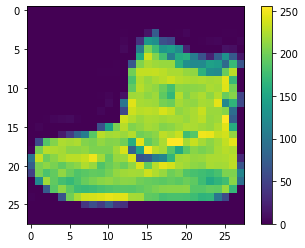

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# 값 범위를 0~255에서 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

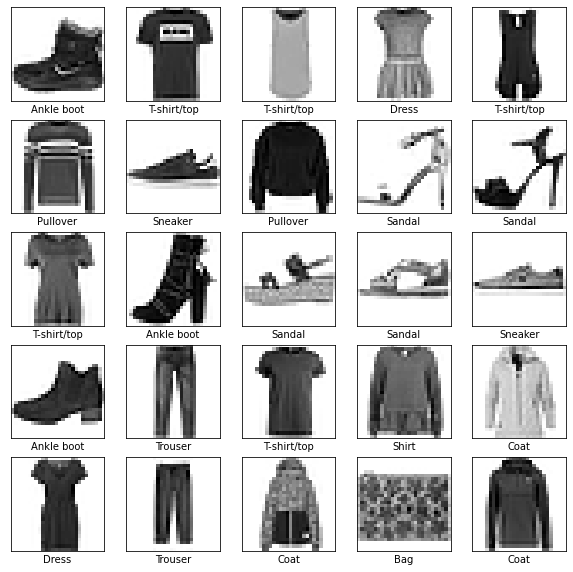

In [12]:
# 확인
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**모델 구성**

층 설정

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)), #1차원 배열로 변환
                             tf.keras.layers.Dense(128, activation='relu'), #밀집연결/완전연결층
                             tf.keras.layers.Dense(10) #소프트맥스 층
])

모델 컴파일 (손실함수, 옵티마이저, 메트릭)

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**모델 훈련**

모델 fit

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2834 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2710 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2596 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2504 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

정확도 평가

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3398 - accuracy: 0.8841 - 522ms/epoch - 2ms/step

Test accuracy: 0.8841000199317932


예측하기

In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)
predictions[0]

array([3.6181357e-06, 4.4937281e-09, 2.1200528e-09, 2.2431685e-12,
       1.9316149e-06, 1.1066212e-02, 2.2234795e-07, 4.3298133e-02,
       5.3430296e-07, 9.4562936e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [25]:
# 예측 그래프로 표현하는 함수 생성
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color='blue'
  else:
    color='red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

# 신뢰도 점수 배열 반환하는 함수
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

예측 확인

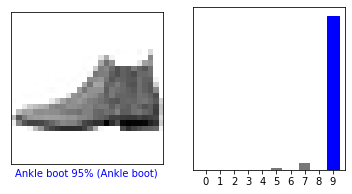

In [26]:
# 0번째 원소 확인
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

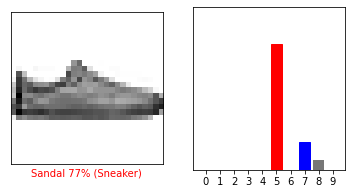

In [27]:
# 12번째 원소 확인
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

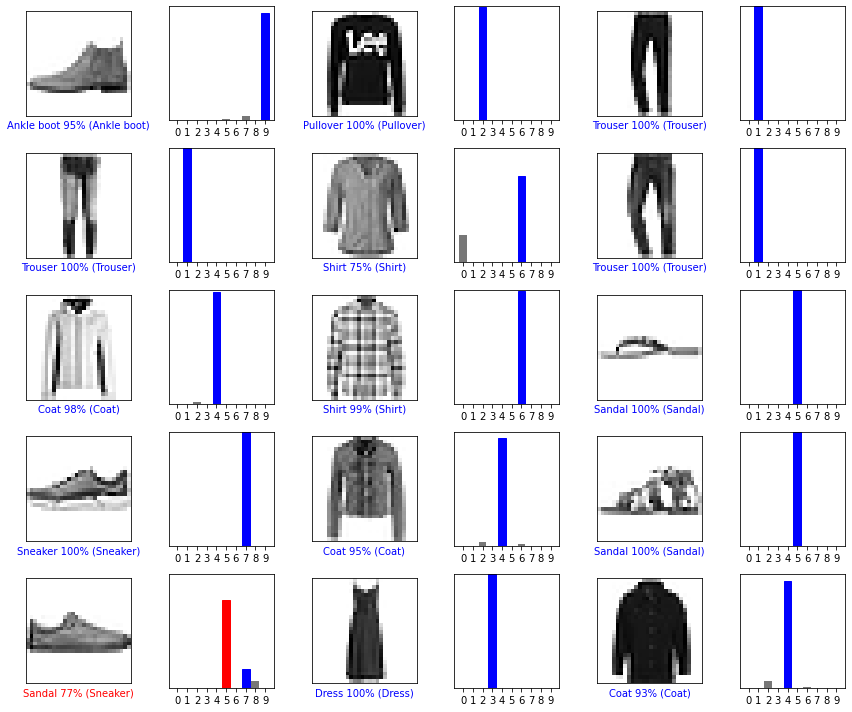

In [28]:
# 여러 원소 확인
num_rows=5
num_cols=3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**훈련된 모델 사용하기**

In [29]:
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
# 차원 늘리기
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [31]:
# 이미지 예측
predictions_single = probability_model.predict(img)
print(predictions_single)

[[3.6619462e-05 2.2233201e-13 9.9819809e-01 7.6569992e-12 8.9591712e-04
  2.4216844e-11 8.6937146e-04 2.3538163e-15 2.6871023e-11 7.5831372e-12]]


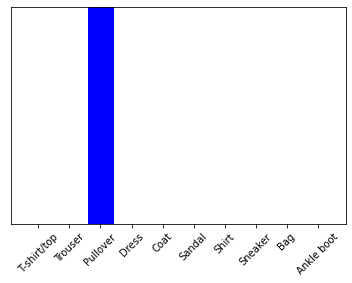

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
np.argmax(predictions_single[0])

2